In [142]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# dimensionality reduction
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

In [5]:
df = pd.read_csv("Bag_of_words_data.csv")

In [7]:
df.shape

(374, 1674)

In [9]:
df.isnull().sum()

company_name_a66         0
company_name_adci        0
company_name_adobe       0
company_name_airtel      0
company_name_alignerr    0
                        ..
rating                   0
employer_estimate        0
avg_salary               0
age                      0
seniority                0
Length: 1674, dtype: int64

In [11]:
df.duplicated().sum() # letting these rows be there for time being, since earlier the data was cleaned to remove duplicates , this time they might have occurred becoz of same encoding 

5

In [13]:
df.columns

Index(['company_name_a66', 'company_name_adci', 'company_name_adobe',
       'company_name_airtel', 'company_name_alignerr', 'company_name_altair',
       'company_name_american', 'company_name_amex', 'company_name_analytics',
       'company_name_ananta',
       ...
       'job_simp_other', 'job_simp_python', 'job_simp_related',
       'job_simp_scientist', 'job_simp_software', 'rating',
       'employer_estimate', 'avg_salary', 'age', 'seniority'],
      dtype='object', length=1674)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Columns: 1674 entries, company_name_a66 to seniority
dtypes: float64(4), int64(1670)
memory usage: 4.8 MB


## Train Test split

In [17]:
# Filter once for training data
train_data = df[df['avg_salary'] != -1]

# Now split into features (xtrain) and target (ytrain) this was required for the modelling phase purpose but since we are still in eda phase,
# we can scale both features and target column together
xtrain = train_data.drop('avg_salary', axis=1)
ytrain = train_data['avg_salary']  # Selecting a single column doesn't need .loc

# For test data
xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis=1)

In [19]:
xtrain.shape, ytrain.shape, xtest.shape

((173, 1673), (173,), (201, 1673))

## Scaling

In [22]:
df.columns

Index(['company_name_a66', 'company_name_adci', 'company_name_adobe',
       'company_name_airtel', 'company_name_alignerr', 'company_name_altair',
       'company_name_american', 'company_name_amex', 'company_name_analytics',
       'company_name_ananta',
       ...
       'job_simp_other', 'job_simp_python', 'job_simp_related',
       'job_simp_scientist', 'job_simp_software', 'rating',
       'employer_estimate', 'avg_salary', 'age', 'seniority'],
      dtype='object', length=1674)

In [24]:
cols_scale_train = xtrain[['rating', 'age']]
cols_scale_test = xtest[['rating', 'age']]

In [26]:
cols_scale_test

,rating,age
39,4.0,225.0
40,3.5,61.0
41,4.1,164.0
42,3.7,43.0
43,4.6,17.0
...,...,...
369,3.9,15.0
370,4.7,61.0
371,4.1,61.0
372,4.3,9.0


In [28]:
cols_scale_train.isna().sum()

rating    0
age       0
dtype: int64

In [30]:
print(cols_scale_train.mean())
print(cols_scale_test.mean())

rating     4.000000
age       68.560694
dtype: float64
rating     3.998010
age       67.920398
dtype: float64


In [32]:
scaler1 = MinMaxScaler()
xtrain_trf = scaler1.fit_transform(cols_scale_train)
xtest_trf = scaler1.transform(cols_scale_test)

In [34]:
type(xtest_trf)

numpy.ndarray

In [36]:
scaled_train_X = pd.DataFrame(xtrain_trf, columns = cols_scale_train.columns)
scaled_test_X = pd.DataFrame(xtest_trf, columns = cols_scale_test.columns)

In [20]:
# this is done so that when we merge encoded and scaled columns into one they are merged properly
# but maybe original xtrain wont be required anymore after merging we'll get a new df
# xtrain.reset_index(drop = 'first', inplace = True)
# xtest.reset_index(drop = 'first', inplace = True)

## Encoding - done in a separate notebook

In [22]:
# st = set()
# for i in xtrain['skills']:
#     for skill in i.split(','):
#         st.add(skill.strip())
# len(st)
    

`skills column looked like this` - {'.NET',
 'AI',
 'AJAX',
 'APIs',
 'ASP.NET',
 'AWS',
 'Administrative experience',
 'Adobe Creative Suite',
 'Agile',
 'Alteryx',
 'Analysis skills',
 'Analytics',
 'Android',
 'Angular',
 'Apache Hive',
 'Application development',
 'ArcGIS',
 'Azure',
 'Big data',
 'Bootstrap',
 'Business analysis',
 'Business intelligence',
 'C#',
 'CI/CD',
 'CSS',
 'Cassandra',
 'Clerical experience',
 'Clinical research',
 'Cloud architecture',
 'Cloud computing',
 'Cloud infrastructure',
 'Communication skills',
 'Computer science',
 'Computer vision',
 'Content development',
 'Customer service',
 'Data analysis skills',
 'Data entry',
 'Data management',
 'Data mining',
 'Data modeling',
 'Data science',
 'Data structures',
 'Data visualization',
 'Database management',
 'Databases',
 'Deep learning',
 'DevOps',
 'Django',
 'Docker',
 'Elasticsearch',
 'Electrical experience',
 'English',
 'Enterprise Software',
 'FTP',
 'Financial services',
 'Git',
 'Go',
 'Google AdWords',
 'Google Cloud Platform',
 'Gradle',
 'Hadoop',
 'Image processing',
 'Incident response',
 'Information security',
 'Java',
 'Jira',
 'Kanban',
 'Kubernetes',
 'Laboratory experience',
 'Learning technology',
 'Less',
 'Linux',
 'Lucene',
 'MATLAB',
 'MVC',
 'Machine learning',
 'Management',
 'Math',
 'Microservices',
 'Microsoft Access',
 'Microsoft Excel',
 'Microsoft Office',
 'Microsoft Powerpoint',
 'Microsoft SQL Server',
 'Mobile applications',
 'MongoDB',
 'Multilingual',
 'NFS',
 'Natural language processing',
 'NoSQL',
 'Node.js',
 'Ontology',
 'Operating systems',
 'Oracle',
 'PCI',
 'PaaS',
 'Performance tuning',
 'Power BI',
 'Predictive analytics',
 'Presentation skills',
 'Pricing',
 'Procurement',
 'Project management',
 'Python',
 'Quality assurance',
 'R',
 'RMF',
 'React',
 'Relational databases',
 'Research',
 'Research & development',
 'Risk management',
 'Rust',
 'SAFe',
 'SAP',
 'SAP HANA',
 'SAP S/4HANA',
 'SAS',
 'SOX',
 'SQL',
 'SSRS',
 'Scalability',
 'Search engines',
 'SharePoint',
 'Software deployment',
 'Software development',
 'Software testing',
 'Software troubleshooting',
 'Spark',
 'Statistical analysis',
 'Statistics',
 'Supply chain',
 'System administration',
 'System design',
 'Tableau',
 'TensorFlow',
 'Test-driven development',
 'Training & development',
 'Visual Basic',
 'Web development',
 'XML',
 'iOS'}

##### Problems encountered : tried looking into the encoding notebook
1) how to deal with description col with many lines
2) how to deal with cols with hundreds of categories - maybe we can make a new category as other
3) how to deal with skills col - like we want the model should capture the importance of each skill type on the salary - so what should be done how it should be encoded ? as separate skill tag each or according to the value counts output with around 100 categoies ..
4) even if we have collected all the unique skill tags in a set , now the problem arises to associate each skill tag with each job title and then associate salary with it.

In [38]:
scaled_train_X.shape

(173, 2)

In [40]:
subset = xtrain.drop(columns=['rating', 'age']).reset_index(drop=True)
subset2 = xtest.drop(columns=['rating', 'age']).reset_index(drop=True)

In [42]:
subset.shape

(173, 1671)

In [44]:
final_train_x = pd.concat([scaled_train_X,subset], axis = 1)#.shape
final_test_x = pd.concat([scaled_test_X,subset2], axis = 1)#.shape

In [46]:
final_train_x.head()

,rating,age,company_name_a66,company_name_adci,company_name_adobe,company_name_airtel,company_name_alignerr,company_name_altair,company_name_american,company_name_amex,...,job_simp_machine,job_simp_manager,job_simp_nlp,job_simp_other,job_simp_python,job_simp_related,job_simp_scientist,job_simp_software,employer_estimate,seniority
0,0.71875,0.558559,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
1,0.71875,0.489489,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.71875,0.180180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.0
3,0.71875,0.180180,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2.0
4,0.75000,0.072072,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


## Dimensionality reduction - Applying PCA 

In [48]:
pca = PCA(n_components = None) # None by default takes min(nsamples, nfeatures)-1
xtrain_pca = pca.fit_transform(final_train_x)
xtest_pca = pca.transform(final_test_x)

pca.explained_variance_ratio_.shape

(173,)

In [50]:
xtrain.shape

(173, 1673)

In [52]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [54]:
cumulative_variance#[:5]

array([0.07869806, 0.12378997, 0.16468958, 0.19956292, 0.23161461,
       0.25702777, 0.28078458, 0.30305372, 0.32438265, 0.34456573,
       0.36184834, 0.37893484, 0.3950263 , 0.41061188, 0.42612741,
       0.44100999, 0.45470698, 0.46699441, 0.47876163, 0.49014733,
       0.50107084, 0.51188625, 0.52218741, 0.53219733, 0.54189342,
       0.55145462, 0.56074221, 0.56964746, 0.57832901, 0.58687313,
       0.59523101, 0.60331867, 0.61108182, 0.61859421, 0.62598158,
       0.6330691 , 0.64009313, 0.6469493 , 0.65370754, 0.66039375,
       0.66705615, 0.67330425, 0.67950758, 0.6856664 , 0.69164281,
       0.69747778, 0.70316626, 0.70877988, 0.71432153, 0.71969037,
       0.7249109 , 0.73004058, 0.73510434, 0.74011407, 0.74509524,
       0.74998731, 0.75478678, 0.75955102, 0.76422221, 0.76879034,
       0.77327163, 0.77770901, 0.78206781, 0.78639516, 0.79062783,
       0.7948174 , 0.79895292, 0.80301975, 0.80702102, 0.81095217,
       0.81484919, 0.81867028, 0.82243117, 0.82618632, 0.82986

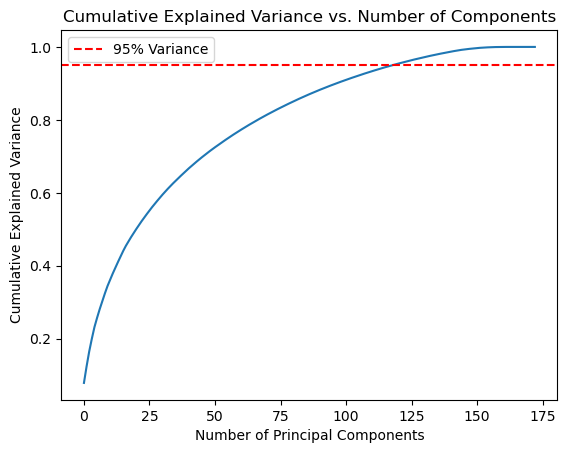

In [56]:
plt.plot(cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

In [58]:
# The PCA object in scikit-learn doesn't inherently provide feature names using get_feature_names_out(). 
# PCA operates on transformed data, where the original feature names lose their meaning
# because PCA creates principal components, which are linear combinations of the original features.
pca.get_feature_names_out 

<bound method ClassNamePrefixFeaturesOutMixin.get_feature_names_out of PCA()>

Interpretation:
- pca.components_ tells you the directions (axes) of the new feature space.
- pca.explained_variance_ratio_ tells you how much variance each new axis captures from the original data.

In [64]:
pca.components_

array([[ 1.80219719e-02,  3.44498578e-03, -1.29678845e-03, ...,
         1.90274529e-02,  2.55890550e-02,  2.29981162e-01],
       [ 8.46677934e-03,  4.16207583e-02,  2.73927877e-03, ...,
        -9.40137894e-04,  3.43149669e-02, -9.25204639e-02],
       [ 1.48056783e-02, -7.63790955e-03,  6.20353800e-04, ...,
        -5.01987512e-02, -4.52018363e-02, -1.33737850e-01],
       ...,
       [ 2.66982727e-02,  3.85150246e-02, -1.25957838e-02, ...,
        -4.98392993e-03,  1.24900090e-16,  1.42247325e-16],
       [ 9.87062118e-03,  1.26537782e-02,  3.02324691e-02, ...,
        -8.10226120e-03,  5.37764278e-17,  2.77555756e-17],
       [ 1.13261565e-02, -3.22045681e-02, -6.74177730e-03, ...,
        -6.24760781e-03, -3.81639165e-17, -4.16333634e-17]])

In [68]:
# # Check norms of principal components
# A norm is a way to measure the size or length of a vector. Think of it as how "big" or "long" a vector is in space.
np.linalg.norm(pca.components_, axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [330]:
# to see what all features contribute more to respective principal component row wise 
# though we would not be able to see much , since the dimensionality is quite high 
components_share = pd.DataFrame(pca.components_, columns = xtrain.columns)
components_share.shape

(173, 1673)

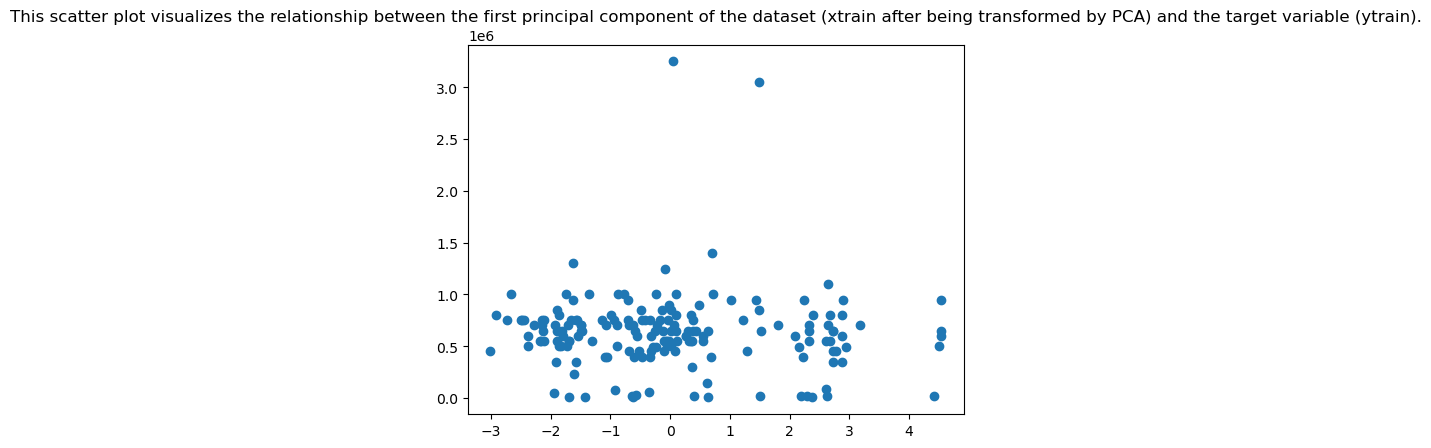

In [70]:
pca2 = PCA(n_components=1)
plt.scatter(pca2.fit_transform(final_train_x), ytrain)
plt.title("This scatter plot visualizes the relationship between the first principal component of the dataset (xtrain after being transformed by PCA) and the target variable (ytrain).")
plt.show()

In [332]:
pca3d = PCA(n_components=3)
temp = pca3d.fit_transform(final_train_x)
fig = px.scatter_3d(temp, x = temp[:,0], y = temp[:,1], z = ytrain)
fig.show()

In [72]:
pca3 = PCA(n_components = 0.90)
xtrain_pca = pca3.fit_transform(final_train_x)
xtest_pca = pca3.transform(final_test_x)
pca3.explained_variance_ratio_.shape

(98,)

In [99]:
ytrain

0       550000.0
1       600000.0
2         5000.0
3      1000000.0
4       550000.0
         ...    
341     650000.0
342     600000.0
343     500000.0
344      10000.0
345     650000.0
Name: avg_salary, Length: 173, dtype: float64

## Modeling

In [133]:
def evaluate_r2(xtrain, ytrain, model):
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    
    # Define KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store the scores
    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []
        
    # Perform cross-validation
    for train_index, val_index in kf.split(xtrain):
        # note that agr xtrain is df then use iloc otherwise on arrays iloc won't work and vice versa
        X_train, X_val = xtrain[train_index], xtrain[val_index]
        y_train, y_val = ytrain.iloc[train_index], ytrain.iloc[val_index]
        
        # Create the model
        #model = create_model()
        
        # Train the model
        model.fit(X_train, y_train)
        ypred = model.predict(X_val)
        
        # Evaluate the model on the validation set
        # r2score = r2_score(y_val, ypred)
        # cv_scores.append(score)

        mae_scores.append(mean_absolute_error(y_val, ypred))
        mse_scores.append(mean_squared_error(y_val, ypred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, ypred)))
        r2_scores.append(r2_score(y_val, ypred))
        
    # Print the cross-validation scores
    print("Cross-validation r2 scores:", r2_scores)
    print("Average r2 score:", np.mean(r2_scores))
    
    print("Cross-validation MAE scores:", mae_scores)
    print(f"Average MAE: {np.mean(mae_scores)}")
    
    print("Cross-validation MSE scores:", mse_scores)
    print(f"Average MSE: {np.mean(mse_scores)}")
    
    print("Cross-validation RMSE scores:", rmse_scores)
    print(f"Average RMSE: {np.mean(rmse_scores)}")


### Multiple Linear Regression

In [136]:
simplelr = LinearRegression()
simplelr.fit(xtrain_pca,ytrain)
evaluate_r2(xtrain_pca, ytrain, simplelr)

Cross-validation r2 scores: [-10.917098514907055, -6.781416420478301, -2.4618824491992686, -1.9861400932577293, -38.33795175951213]
Average r2 score: -12.096897847470895
Cross-validation MAE scores: [597226.6967207891, 553947.7610866785, 873722.4960953785, 470783.2497289709, 672774.1173692734]
Average MAE: 633690.8642002182
Cross-validation MSE scores: [567821532328.6328, 567559146858.6721, 1437560770533.0051, 393532652398.6255, 1303004996230.7744]
Average MSE: 853895819669.942
Cross-validation RMSE scores: [753539.336948399, 753365.2147920503, 1198983.223624503, 627321.8092802333, 1141492.4424764162]
Average RMSE: 894940.4054243204


In [113]:
final_train_x

,rating,age,company_name_a66,company_name_adci,company_name_adobe,company_name_airtel,company_name_alignerr,company_name_altair,company_name_american,company_name_amex,...,job_simp_machine,job_simp_manager,job_simp_nlp,job_simp_other,job_simp_python,job_simp_related,job_simp_scientist,job_simp_software,employer_estimate,seniority
0,0.71875,0.558559,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
1,0.71875,0.489489,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.71875,0.180180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.0
3,0.71875,0.180180,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2.0
4,0.75000,0.072072,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.62500,0.210210,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2.0
169,0.71875,0.180180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
170,0.68750,0.027027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
171,0.75000,0.072072,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0


In [115]:
# used dynamic feature elemination technique here
# RFE - Recursive Feature Elimination (note that this cell takes some time to run)

from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select = 10)
xrfe = rfe.fit_transform(final_train_x, ytrain)
selected_features = final_train_x.columns[rfe.support_]
selected_features

Index(['company_name_company', 'job_description_detailed',
       'job_description_thought', 'job_description_visionary', 'Type_business',
       'Industry_advertising', 'Industry_public', 'Sector_accommodation',
       'Sector_travel', 'skills_adwords'],
      dtype='object')

In [152]:
final_train_x.shape, x_new.shape, ytrain.shape

((173, 1673), (173, 10), (173,))

In [160]:
ytrain

0       550000.0
1       600000.0
2         5000.0
3      1000000.0
4       550000.0
         ...    
341     650000.0
342     600000.0
343     500000.0
344      10000.0
345     650000.0
Name: avg_salary, Length: 173, dtype: float64

In [166]:
np.asarray(ytrain)

array([ 550000.,  600000.,    5000., 1000000.,  550000., 1400000.,
        950000.,   17500.,   13000.,  650000.,  550000.,  750000.,
         10000.,  700000., 1000000.,  600000.,  600000.,  700000.,
        750000.,  500000.,  492500.,  700000.,  650000., 3250000.,
        850000.,  500000.,  350000.,   16500.,   14000.,  700000.,
        700000.,  550000.,  850000., 3050000., 1100000.,   20000.,
        700000.,  450000.,   55000., 1000000.,  700000.,  950000.,
        230000.,  950000.,  750000.,  550000.,  750000.,  950000.,
        450000., 1000000.,  750000.,  650000.,  800000.,  800000.,
        650000.,  400000.,  750000.,  700000.,  600000.,  900000.,
        650000.,  492500.,  950000.,  500000.,   20000.,  700000.,
         16000.,  800000.,  800000.,  400000.,   20000.,  800000.,
        750000.,  148000.,  400000.,  650000.,    4500.,  750000.,
        550000.,  550000., 1000000.,  750000.,  750000.,  650000.,
        600000.,  750000.,  550000.,  700000., 1000000.,  4500

In [158]:
x_with_intercept

,const,company_name_company,job_description_detailed,job_description_thought,job_description_visionary,Type_business,Industry_advertising,Industry_public,Sector_accommodation,Sector_travel,skills_adwords
0,1.0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
168,1.0,0,0,0,0,0,0,0,0,0,0
169,1.0,0,0,0,0,0,0,0,0,0,0
170,1.0,0,0,0,0,0,0,0,0,0,0
171,1.0,0,0,0,0,0,0,0,0,0,0


In [168]:
x_new = final_train_x[['company_name_company', 'job_description_detailed',
       'job_description_thought', 'job_description_visionary', 'Type_business',
       'Industry_advertising', 'Industry_public', 'Sector_accommodation',
       'Sector_travel', 'skills_adwords']]

x_with_intercept = sm.add_constant(x_new)
ols_model_before_pca = sm.OLS(np.asarray(ytrain), x_with_intercept).fit()
ols_model_before_pca.summary()
# x_new.iloc[[  0,   1,   2,   3,   4,   5,   6  ]]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     9.323
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.04e-09
Time:                        19:30:55   Log-Likelihood:                -2440.0
No. Observations:                 173   AIC:                             4896.
Df Residuals:                     165   BIC:                             4921.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      6.179e+05   2.57e+04     24.081      0.000    5.67e+05    6.69e+05
company_name_company          -3e+05   4.68e+05     -0.642      0.522   -1.22e+06    6.23e+05
job_description_detailed   4.821e+05   5.73e+05      0.841      0.401    -6.5e+05    1.61e+06
job_description_thought    3.321e+05   5.73e+05      0.580      0.563      -8e+05    1.46e+06
job_description_visionary  2.432e+06   3.32e+05      7.335      0.000    1.78e+06    3.09e+06
Type_business              6.321e+05   3.32e+05      1.907      0.058   -2.25e+04    1.29e+06
Industry_advertising      -1.993e+05   1.11e+05     -1.803      0.073   -4.18e+05    1.89e+04
Industry_public           -1.993e+05   1.11e+05     -1.803      0.073   -4.18e+05    1.89e+04
Sector_accommodation      -2.952e+05   1.66e+05     -1.780      0.077   -6.23e+05    3.22e+04
Sector_travel             -2.952e+05   1.66e+05     -1.780      0.077   -6.23e+05    3.22e+04
skills_adwords            -1.993e+05   1.11e+05     -1.803      0.073   -4.18e+05    1.89e+04
==============================================================================
Omnibus:                      149.588   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4412.134
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      27.082   Cond. No.                     6.39e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.24e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [139]:
# this below fit on the model is giving even worse results than lr on pca k baad vala data
# see below cell for output 

# x_new = final_train_x[['company_name_company', 'job_description_detailed',
#        'job_description_thought', 'job_description_visionary', 'Type_business',
#        'Industry_advertising', 'Industry_public', 'Sector_accommodation',
#        'Sector_travel', 'skills_adwords']]
# lr.fit(x_new, ytrain)
# evaluate_r2(x_new, ytrain, lr)

Cross-validation r2 scores: [-0.02130620524251947, -0.17648535613727567, -3.0450879687097345e+25, -0.0040572373805487505, -0.17677975815852554]
Average r2 score: -6.090175937419469e+24
Cross-validation MAE scores: [162273.60959651036, 213989.39393939392, 6.035599991429903e+17, 294294.00790166814, 149256.08137992033]
Average MAE: 1.2071199982876203e+17
Cross-validation MSE scores: [48662822893.687515, 85810216153.41724, 1.2644851669217313e+37, 132321088578.04372, 38978895335.41941]
Average MSE: 2.5289703338434626e+36
Cross-validation RMSE scores: [220596.5160506564, 292933.80848481326, 3.5559600207563233e+18, 363759.65771102725, 197430.73553887047]
Average RMSE: 7.111920041514796e+17

In [97]:
xtrain_pca.shape

(173, 98)

In [101]:
import statsmodels.api as sm
sm.add_constant(xtrain_pca)

array([[ 1.        ,  0.54643598,  0.54851564, ..., -0.07896461,
        -0.09126119,  0.39074848],
       [ 1.        ,  0.25973255,  1.69666214, ...,  0.31362515,
         0.25117214,  0.36610498],
       [ 1.        ,  0.62921962,  1.80601191, ...,  0.43109234,
        -0.32594419,  0.33325388],
       ...,
       [ 1.        , -0.05966936, -2.45171136, ...,  0.03149374,
        -0.01568036, -0.18221363],
       [ 1.        , -1.68793257, -2.83863285, ...,  0.00592379,
         0.02301289,  0.05151003],
       [ 1.        ,  0.43673933,  0.56248735, ...,  0.31985214,
         0.00377589, -0.11947283]])

In [103]:
import statsmodels.api as sm
xtrain_with_constant = sm.add_constant(final_train_x)
model = sm.OLS(ytrain, xtrain_with_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.046
Date:                Thu, 06 Feb 2025   Prob (F-statistic):              0.423
Time:                        18:10:45   Log-Likelihood:                -2393.6
No. Observations:                 173   AIC:                             4985.
Df Residuals:                      74   BIC:                             5297.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.319e+05   2.87e+04     22.010      0.0

### Lasso Regression

In [340]:
lasso = Lasso(alpha = 1000000)
lasso.fit(xtrain_pca,ytrain)
evaluate_r2(xtrain_pca, ytrain, lasso)

Cross-validation r2 scores: [-0.05054629944295064, -0.18757859896966966, -0.03649275005701447, -0.032842416084639225, -0.014480518191916758]
Average r2 score: -0.06438811654923815


In [341]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(xtrain_pca, ytrain)
evaluate_r2(xtrain_pca, ytrain, rf)

KeyboardInterrupt: 

# try to get rid of overfitting - restart from here

In [ ]:
r2_score(ytrain,rf.predict(xtrain_pca)) # accuracy on training data - tells overfitting 

In [ ]:
ytrain[0]

In [ ]:
rf.predict(xtrain_pca[0].reshape(1,-1))

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# # Define the RandomForestRegressor model
# rf = RandomForestRegressor(random_state=42)

# # Define the hyperparameters grid you want to search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
#     'max_features': [10, 20, 30, 50, 80, 90, 98],  # Number of features to consider when splitting a node
# }

# # Set up GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 1)

# # Fit GridSearchCV
# grid_search.fit(xtrain_pca, ytrain) 

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(f"Best Hyperparameters: {best_params}")

# # Get the best model
# best_rf = grid_search.best_estimator_

# # Evaluate the model
# # y_pred = best_rf.predict(xtest)  # Replace xtest with your test data
# # mse = mean_squared_error(ytest, y_pred)  
# # print(f"Mean Squared Error on Test Data: {mse}")


In [ ]:
evaluate_r2(xtrain_pca, ytrain, best_rf)

In [ ]:
r2_score(ytrain,best_rf.predict(xtrain_pca)) # accuracy on training data - tells overfitting 

In [ ]:
df

### Inference uptil now - 
Even the great performing models are terrible when we are taking all the initiall columns of the dataset..
lets reconsider how many columns do we actually need in the prediction

In [ ]:
df2 = pd.read_csv("final_data.csv")
df2.info()

#### picking only some of the columns from the dataframe that might impact the salary column prediction

In [54]:
import re
locations = xtrain[[col for col in xtrain.columns if re.match(r'^location',col)]].reset_index(drop='first')
company_name = xtrain[[col for col in xtrain.columns if re.match(r'^company_name',col)]].reset_index(drop='first')
job_simp = xtrain[[col for col in xtrain.columns if re.match(r'^job_simp',col)]].reset_index(drop='first')
skills = xtrain[[col for col in xtrain.columns if re.match(r'^skills',col)]].reset_index(drop='first')

In [56]:
locations.head()

,location_ahmedabad,location_amritsar,location_bengaluru,location_bhubaneshwar,location_calcutta,location_chandigarh,location_chennai,location_cochin,location_coimbatore,location_delhi,...,location_nadu,location_noida,location_pune,location_remote,location_rājkot,location_salem,location_tamil,location_thiruvananthapuram,location_vadodara,location_visakhapatnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
scaled_train_X.index

RangeIndex(start=0, stop=173, step=1)

#### Note that we'll encode job_simp titles as one hot encoded labels to ensure each title stays together - if accuracy doesn't improve 

In [65]:
rest_cols = xtrain[['employer_estimate', 'seniority']].reset_index(drop='first')

In [67]:
scaled_train_X

,rating,age
0,0.71875,0.558559
1,0.71875,0.489489
2,0.71875,0.180180
3,0.71875,0.180180
4,0.75000,0.072072
...,...,...
168,0.62500,0.210210
169,0.71875,0.180180
170,0.68750,0.027027
171,0.75000,0.072072


In [420]:
rest_cols.corr()

,employer_estimate,seniority
employer_estimate,1.000000,0.074831
seniority,0.074831,1.000000


<Axes: >

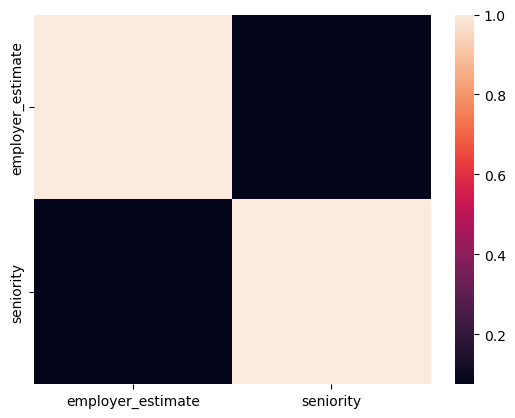

In [376]:
sns.heatmap(rest_cols.corr())

Merging all the extracted columns to form the data

- If your goal is joining based on key columns: merge. (like sql joins that join on a common attribute)
- If you’re just combining dataframes without key-based alignment: concat.

In [69]:
latest_df = pd.concat([scaled_train_X, rest_cols, locations, company_name, job_simp, skills], axis = 1)

In [71]:
latest_df.shape

(173, 445)

Making Predictions on the latest df

In [77]:
# pca on this new data

pca = PCA(n_components=0.95)
x = pca.fit_transform(latest_df)
pca.explained_variance_ratio_.shape

(91,)

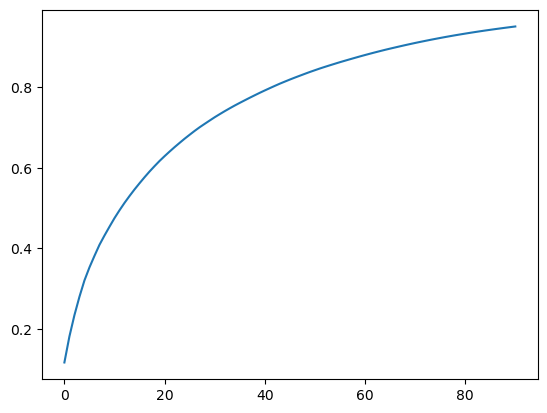

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## try asking for feature importance topic = start from here 

In [85]:
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'max_features': [10, 20, 30, 50, 80, 90, 91],  # Number of features to consider when splitting a node
}

grid = GridSearchCV(estimator = rf2, scoring = 'r2', cv = 5, verbose = 1, param_grid = param_grid)
grid.fit(x, ytrain)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
-0.18483621562422564


In [87]:
required_rf = grid.best_estimator_

In [101]:
feature_imp = np.sort(required_rf.feature_importances_)

In [103]:
sorted_ind = np.argsort(feature_imp)

In [135]:
feature_imp[::-1].shape

(91,)

In [125]:
feature_imp[::-1][:10]

array([0.05924947, 0.0499558 , 0.03700567, 0.03155854, 0.02637153,
       0.0233261 , 0.02193218, 0.02172748, 0.02161167, 0.0174955 ])

In [131]:
x.shape

(173, 91)

In [143]:
x[:,sorted_ind[::-1][:10]].shape

(173, 10)

In [149]:
required_rf.fit(x, ytrain)
r2_score(ytrain, required_rf.predict(x))

0.8275526498892072

In [155]:
mean_absolute_error(ytrain, required_rf.predict(x))

102135.53553290122

In [183]:
evaluate_r2(x, ytrain, required_rf)

Cross-validation r2 scores: [-0.1414473834388914, -0.46152388177102566, -0.05046789414328634, 0.03026360011367124, -0.28835697733311294]
Average r2 score: -0.18230650731452902


In [181]:
# fitting again after selecting top 10 features according to the feature importances calculated above
# but the results are not at all improving!

In [171]:
xtrimmed = x[:,sorted_ind[::-1][:10]]
required_rf.fit(xtrimmed,ytrain)
r2_score(ytrain, required_rf.predict(xtrimmed))

0.8148733264740714

In [173]:
mean_absolute_error(ytrain, required_rf.predict(xtrimmed))

106474.45101304064

In [179]:
evaluate_r2(xtrimmed, ytrain, required_rf)

Cross-validation r2 scores: [-2.0879379961528874, -0.5254473033846059, 0.0007040496388572848, -0.1075888548061803, -0.762176802494408]
Average r2 score: -0.696489381439845


### ANN 

In [29]:
#pip install --upgrade pip


In [30]:
#!pip install tensorflow

In [235]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [239]:
xtrain.shape

(173, 1673)

In [269]:
# applying ANN as our first model because of the huge dimensionality of the data
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = xtrain_pca.shape[1]))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,937 (531.00 KB)

 Trainable params: 135,937 (531.00 KB)

 Non-trainable params: 0 (0.00 B)

In [287]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20)
model.compile(optimizer = 'Adam', loss = 'mse')
history1 = model.fit(xtrain_pca, ytrain, validation_split = 0.2, epochs = 500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 1603266816.0000 - val_loss: 344041816064.0000
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1467999104.0000 - val_loss: 343880826880.0000
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1142026368.0000 - val_loss: 343760437248.0000
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1428104960.0000 - val_loss: 343817748480.0000
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1291005696.0000 - val_loss: 343922835456.0000
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1784785152.0000 - val_loss: 343592042496.0000
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1100660352.0000 - val_loss: 344002527232.0000
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1215326208.0000 - val_loss: 343779049472.0000
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1410283520.0000 - val_loss: 344731418624.0000
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12086

In [35]:
history2 = model.fit(xtrain, ytrain, validation_split = 0.2, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1076081536.0000 - val_loss: 319503630336.0000
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1195996672.0000 - val_loss: 332726239232.0000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1250637568.0000 - val_loss: 322860613632.0000
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1731520640.0000 - val_loss: 334778990592.0000
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1657755904.0000 - val_loss: 319897337856.0000
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2162014464.0000 - val_loss: 334744780800.0000
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1172142976.0000 - val_loss: 321493860352.0000
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1582939520.0000 - val_loss: 331432427520.0000
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1527923968.0000 - val_loss: 325056823296.0000
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12756

In [283]:
from sklearn.metrics import r2_score
r2_score(ytrain, model.predict(xtrain_pca))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


0.5134449447909311

In [37]:
r2_score(ytrain, model.predict(xtrain))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.5284630874200522

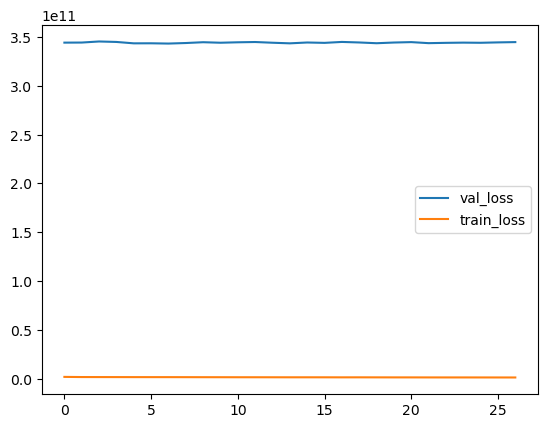

In [285]:
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.plot(history1.history['loss'], label = 'train_loss')
plt.legend()
plt.show()

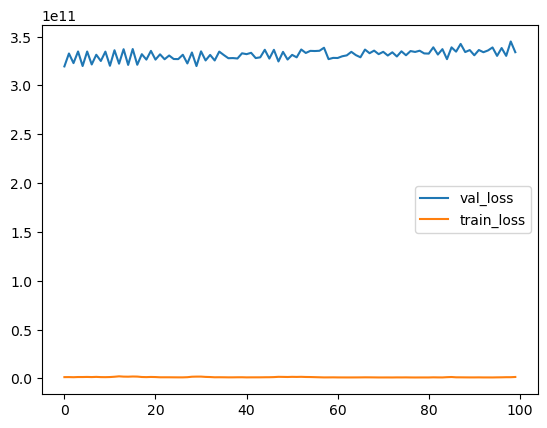

In [40]:
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.plot(history2.history['loss'], label = 'train_loss')
plt.legend()
plt.show()

#### Cross validation and hyperparameter tuning

In [72]:
pd.__version__

'2.2.2'

In [104]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 42)
list(kf.split(xtrain))[0][1].shape

(35,)

In [102]:
xtrain.shape

(173, 1673)

In [106]:
list(kf.split(xtrain))

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  13,  14,
          17,  20,  21,  22,  23,  25,  26,  27,  28,  32,  33,  34,  35,
          36,  37,  39,  40,  43,  44,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  57,  58,  59,  61,  62,  63,  64,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  83,  84,
          85,  86,  87,  88,  89,  91,  92,  94,  95,  96,  97,  98,  99,
         100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 116, 117,
         118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131,
         132, 133, 134, 135, 136, 138, 140, 142, 144, 145, 147, 148, 149,
         150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164,
         165, 166, 167, 168, 169, 170, 171, 172]),
  array([  9,  12,  15,  16,  18,  19,  24,  29,  30,  31,  38,  41,  42,
          45,  55,  56,  60,  65,  78,  82,  90,  93, 108, 111, 113, 114,
         115, 124, 137, 139, 141, 143, 146, 153, 162])),
 (ar

In [116]:
xtrain.iloc[train_index,:]

,company_name_a66,company_name_adci,company_name_adobe,company_name_airtel,company_name_alignerr,company_name_altair,company_name_american,company_name_amex,company_name_analytics,company_name_ananta,...,job_simp_nlp,job_simp_other,job_simp_python,job_simp_related,job_simp_scientist,job_simp_software,rating,employer_estimate,age,seniority
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.1,0,187.0,2.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.1,0,164.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,4.1,1,61.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,4.1,0,61.0,2.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.2,0,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3.8,0,71.0,2.0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4.1,0,61.0,1.0
343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,0,10.0,2.0
344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.2,1,25.0,1.0


In [128]:
ytrain.iloc[train_index]

0       550000.0
2         5000.0
3      1000000.0
4       550000.0
5      1400000.0
         ...    
338     500000.0
339     550000.0
341     650000.0
342     600000.0
344      10000.0
Name: avg_salary, Length: 139, dtype: float64

In [132]:
model.evaluate(xtrain,ytrain)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27737513984.0000


23900164096.0

The model.evaluate function predicts the output for the given input and then computes the metrics function specified in the model.compile and based on y_true and y_pred and returns the computed metric value as the output.

The model.predict just returns back the y_pred

In [135]:
from sklearn.model_selection import KFold
import numpy as np

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the scores
cv_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(xtrain):
    X_train, X_val = xtrain.iloc[train_index,:], xtrain.iloc[val_index,:]
    y_train, y_val = ytrain.iloc[train_index], ytrain.iloc[val_index]
    
    # Create the model
    #model = create_model()
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model on the validation set
    score = r2_score(y_val, model.predict(X_val))
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-validation r2 scores:", cv_scores)
print("Average r2 score:", np.mean(cv_scores))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Cross-validation r2 scores: [0.9884719885373812, -0.8639866107353724, 0.7789233311551345, 0.9641507503859562, 0.9583806549662084]
Average r2 score: 0.5651880228618615


# we have to try 

all below steps we'll do to improve the performance of our ANN but before that we'll try other simpler ML models!
- early stopping
- regularization l2 and l1
- dropout

## Evaluation